# K-Means Clustering
-----

### <p><a id="top" style="color:#433878; text-decoration: none;">Table of contents:</a></p>

<body style="font-family: 'Gloria Hallelujah', cursive; font-size: 1.4rem; background: whitesmoke; margin: 0; padding: 1rem; display: grid; place-items: center; min-height: 100vh;">
    <center>
	<ul style="list-style-position: inside; width: 600px; max-width: 100%; background: white; box-shadow: 0.25rem 0.25rem 0.75rem rgba(0, 0, 0, 0.15); padding: 0; margin: 0; border-radius: 0.1rem;">
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#1" style="color: #433878; text-decoration: none;">Importing the libraries</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#2" style="color: #433878; text-decoration: none;">Importing the dataset</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#3" style="color: #433878; text-decoration: none;">Data analysis</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#4" style="color: #433878; text-decoration: none;">Get features</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#5" style="color: #433878; text-decoration: none;">Using the elbow mehod to find the optimal number of clusters</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#6" style="color: #433878; text-decoration: none;">Training the K-Means Clustering model on training set</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#7" style="color: #433878; text-decoration: none;">Print the size of each cluster</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#8" style="color: #433878; text-decoration: none;">Plot the clusters</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#9" style="color: #433878; text-decoration: none;">Sources</a></li>
	</ul>
  </center>      
</body>

## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_csv("worldcities.csv")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (47868, 11)
Number of rows: 47868
Number of columns: 11


In [5]:
dataset.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [6]:
dataset.tail()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139
47867,Charlotte Amalie,Charlotte Amalie,18.3420,-64.9331,U.S. Virgin Islands,VI,VIR,Virgin Islands,primary,NaN,1850037473


## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [7]:
# To analyze descriptive statistics of data
dataset.describe()

,lat,lng,population,id
count,47868.000000,47868.000000,4.765600e+04,4.786800e+04
mean,25.534513,16.331353,1.089227e+05,1.449074e+09
std,23.000405,70.298580,6.857896e+05,2.611200e+08
min,-54.933300,-179.600000,0.000000e+00,1.004003e+09
25%,12.319175,-43.879350,1.220475e+04,1.250640e+09
50%,31.309600,14.663500,2.091550e+04,1.380480e+09
75%,42.810675,77.020000,4.690000e+04,1.704214e+09
max,81.716600,179.370300,3.773200e+07,1.934976e+09


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47868 entries, 0 to 47867
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        47868 non-null  object 
 1   city_ascii  47867 non-null  object 
 2   lat         47868 non-null  float64
 3   lng         47868 non-null  float64
 4   country     47868 non-null  object 
 5   iso2        47835 non-null  object 
 6   iso3        47868 non-null  object 
 7   admin_name  47671 non-null  object 
 8   capital     13023 non-null  object 
 9   population  47656 non-null  float64
 10  id          47868 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB


In [9]:
dataset.isnull().sum()

city              0
city_ascii        1
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      197
capital       34845
population      212
id                0
dtype: int64

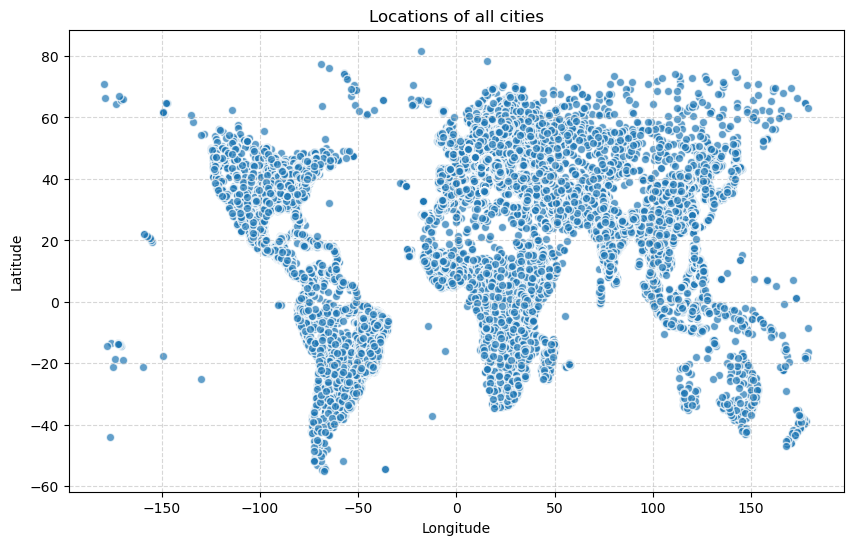

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot points with color and size based on additional data (if available)
plt.scatter(dataset['lng'], dataset['lat'], 
            cmap='viridis', alpha=0.7, edgecolors='w')

# Label the axes and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Locations of all cities")

# Add a grid to the plot for easier readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

## Step 4: <span id="4" style="color: #4A628A">Get features ✂️ </span>[🔝](#top)

In [11]:

x = dataset.iloc[:,[2, 3]].values


In [12]:
x

array([[ 35.6897, 139.6922],
       [ -6.175 , 106.8275],
       [ 28.61  ,  77.23  ],
       ...,
       [ 34.9897, 126.4714],
       [ 36.6009, 126.665 ],
       [ 18.342 , -64.9331]])

## Step 5: <span id="5" style="color: #4A628A">Using the elbow mehod to find the optimal number of clusters </span>[🔝](#top)

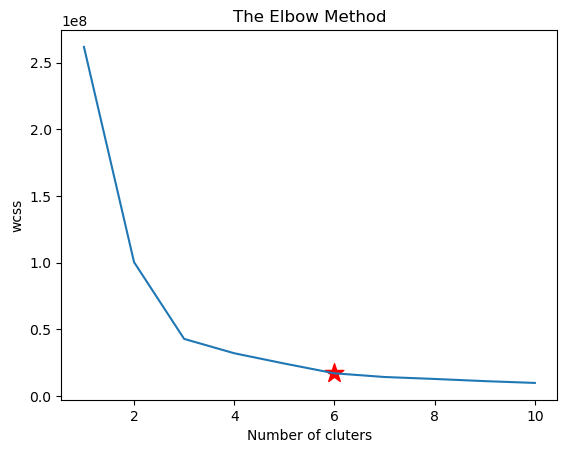

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.scatter(6,wcss[5], s = 200, c = 'red', marker='*')
plt.title("The Elbow Method")
plt.xlabel("Number of cluters")
plt.ylabel("wcss")
plt.show()

From above elbow plot its clear that clustering scores slows down after 6 number of clusters. So we can use K= 6 for further analysis.

## Step 6: <span id="6" style="color: #4A628A">Training the K-Means Clustering model on training set 🛠️ </span>[🔝](#top)

In [14]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=42)
kmeans.fit(x)


KMeans(n_clusters=6, random_state=42)

## Step 7: <span id="7" style="color: #4A628A">Print the size of each cluster 🎯 </span>[🔝](#top)

In [15]:
print("Cluster sizes:", [(kmeans.labels_ == i).sum() for i in range(6)])

Cluster sizes: [8939, 9737, 15293, 4362, 3372, 6165]


## Step 8: <span id="8" style="color: #4A628A">Plot the clusters 📊 </span>[🔝](#top)

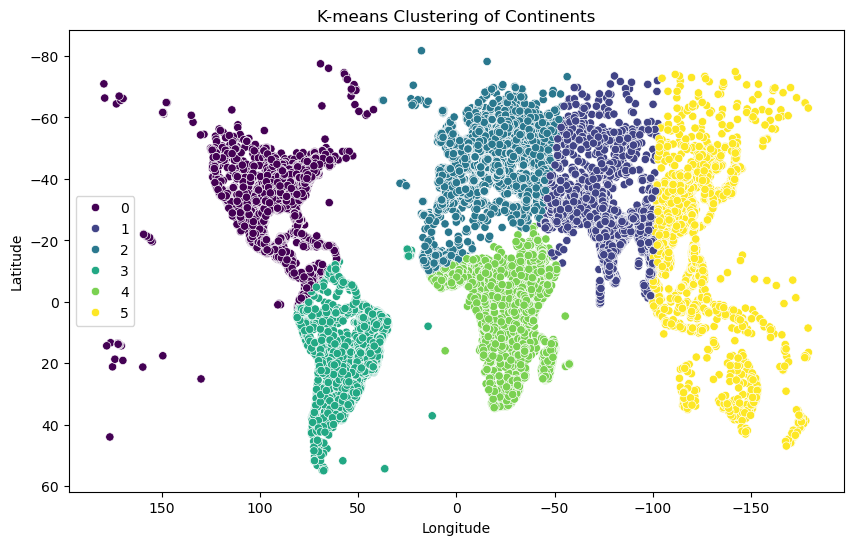

In [16]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=-dataset['lng'], y=-dataset['lat'], hue=kmeans.labels_, palette='viridis', legend='full')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-means Clustering of Continents")
plt.gca().invert_yaxis()  
plt.gca().invert_xaxis()  
plt.show()

## <a id="9">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
- kaggle : https://www.kaggle.com/datasets/juanmah/world-cities
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20